# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
* Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
import pandas as pd
df = pd.read_csv('nashville-meetup/group-edges.csv')
df.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [2]:
meta = pd.read_csv('nashville-meetup/meta-groups.csv')
meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [3]:
import networkx as nx

group_dict = dict(zip(meta.group_id, meta.group_name))
G = nx.Graph()
for row in df.index:
    g1 = group_dict[df.group1[row]]
    g2 = group_dict[df.group2[row]]
    weight = df.weight[row]
    G.add_edge(g1, g2, weight=weight)

## Visualize the Network

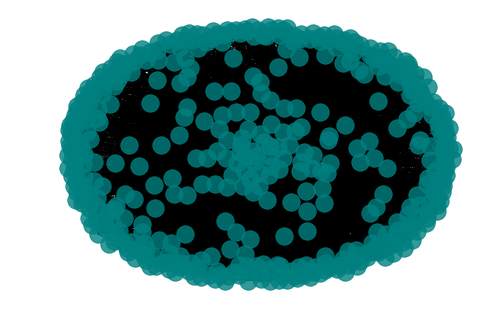

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G, pos=nx.spring_layout(G, k=2, random_state=5), alpha=.8, node_color='teal')

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [5]:
for i in range(0,100,5):
    print("{}tht percentile: {}".format(i, df.weight.quantile(q=i/100)))

0tht percentile: 1.0
5tht percentile: 1.0
10tht percentile: 1.0
15tht percentile: 1.0
20tht percentile: 1.0
25tht percentile: 1.0
30tht percentile: 1.0
35tht percentile: 1.0
40tht percentile: 1.0
45tht percentile: 1.0
50tht percentile: 1.0
55tht percentile: 1.0
60tht percentile: 1.0
65tht percentile: 1.0
70tht percentile: 2.0
75tht percentile: 2.0
80tht percentile: 2.0
85tht percentile: 3.0
90tht percentile: 4.0
95tht percentile: 7.0


146


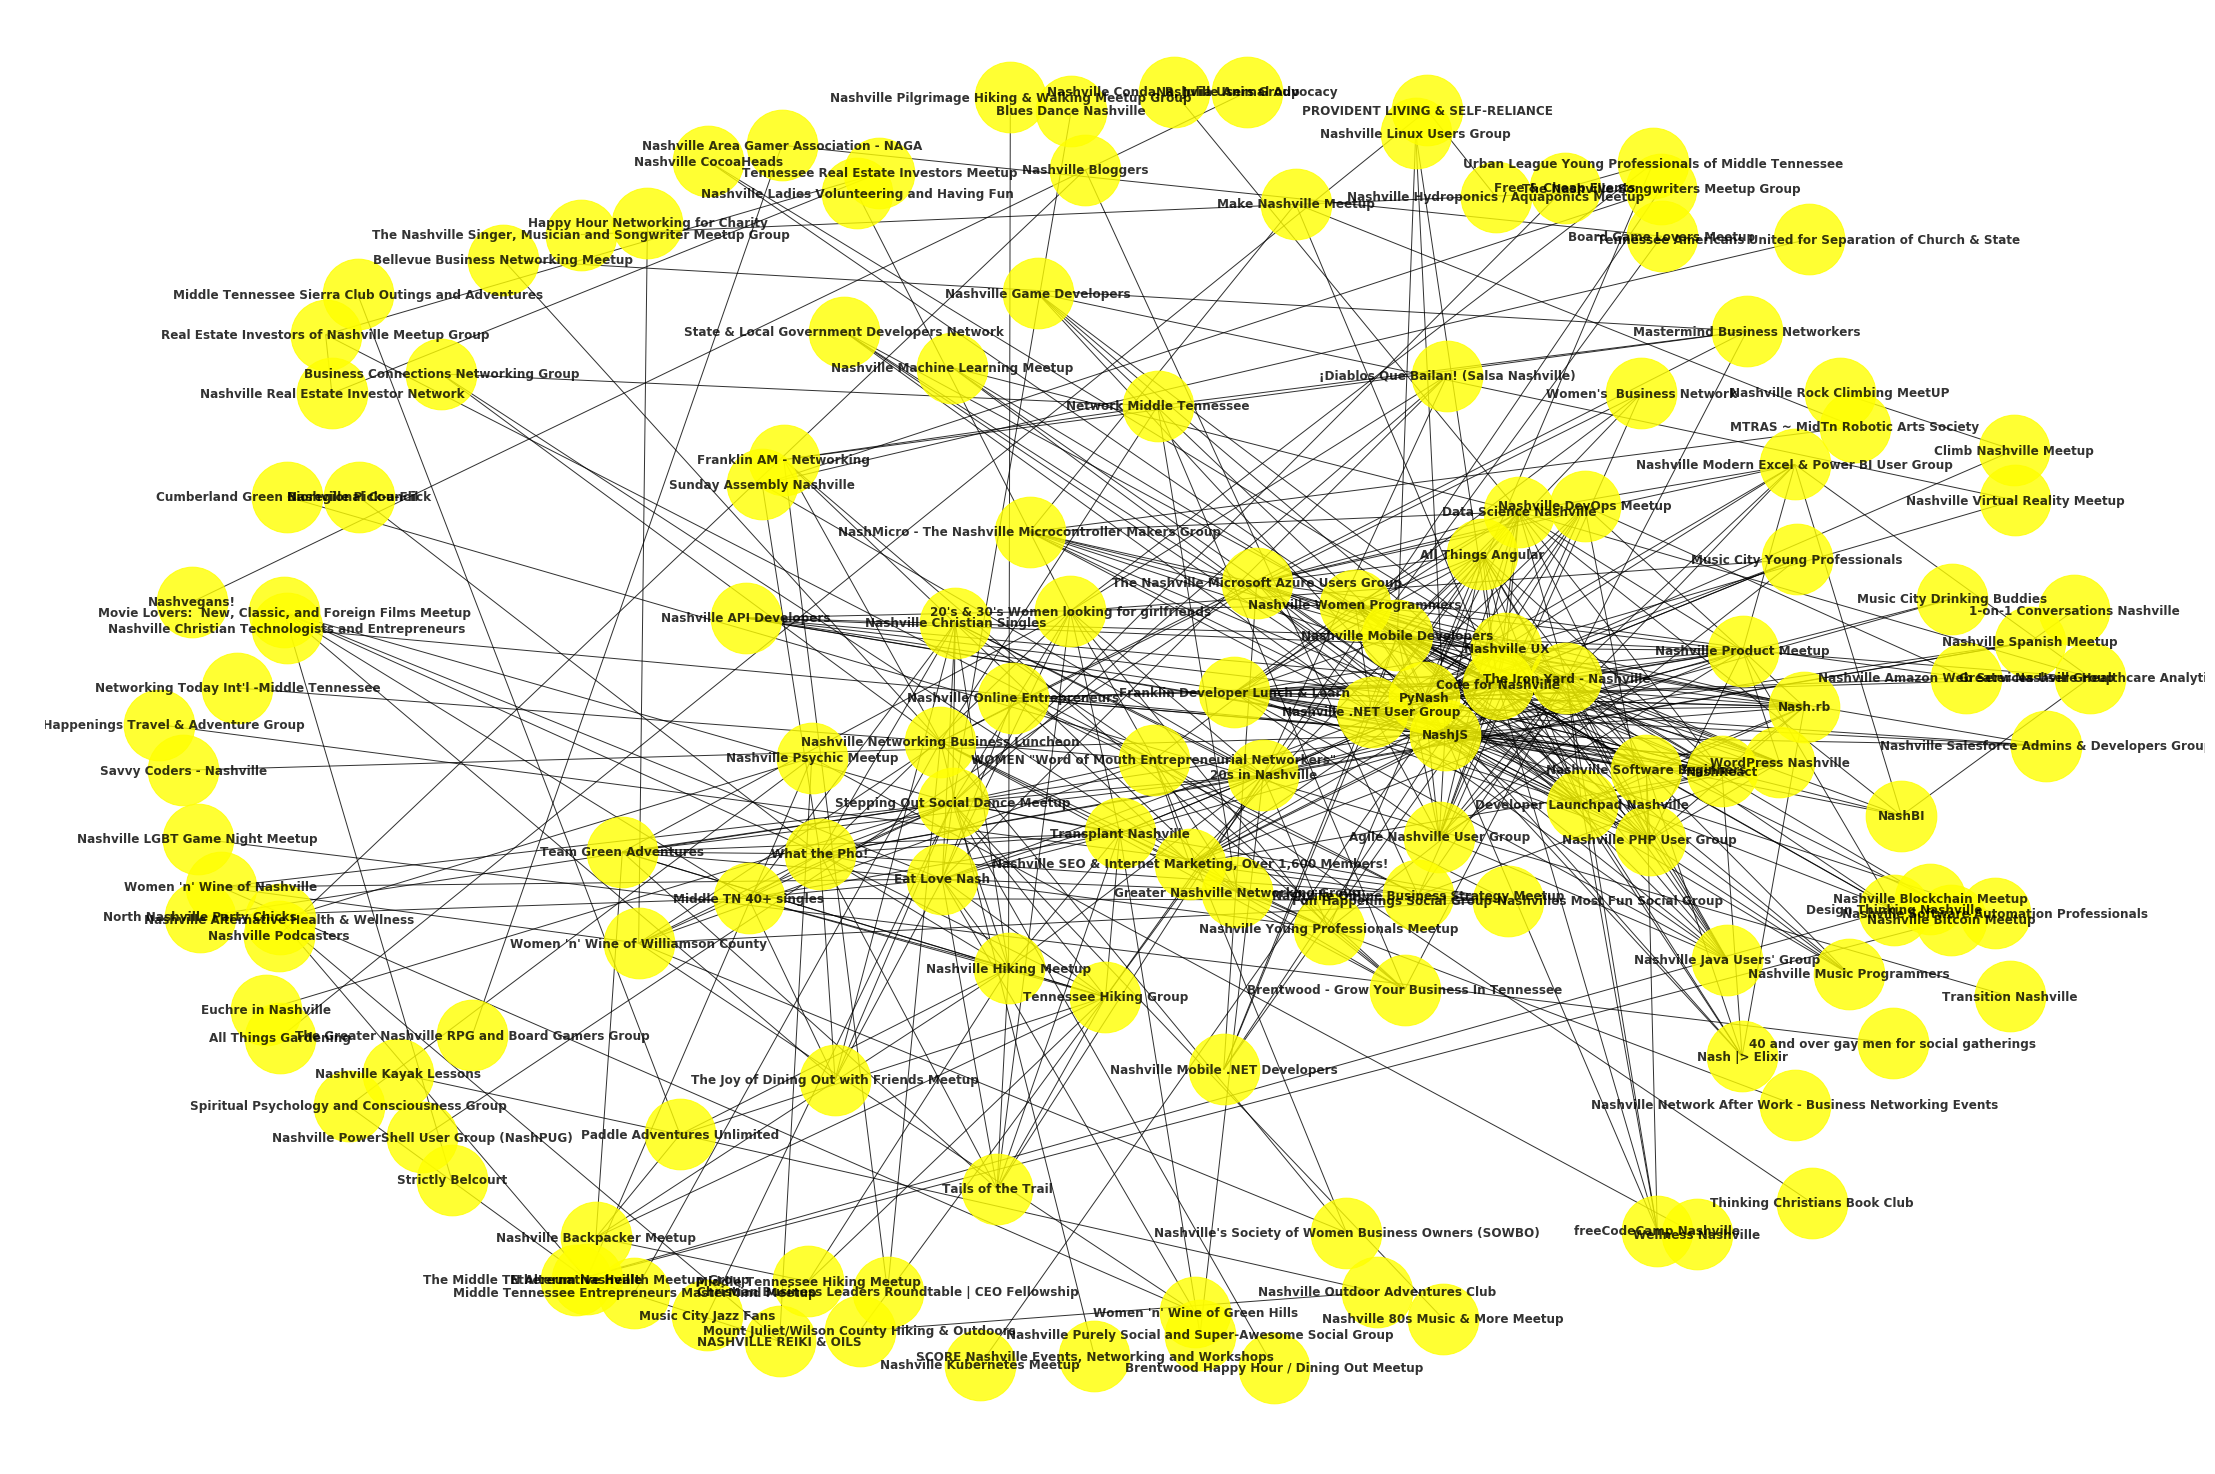

In [6]:
threshold = 5
G_subset = nx.Graph()
for row in df.index:
    g1 =group_dict[df.group1[row]]
    g2 = group_dict[df.group2[row]]
    weight = df.weight[row]
    if weight > threshold:
        G_subset.add_edge(g1, g2, weight=weight)
plt.figure(figsize=(30,20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, random_state=5), alpha=.8, node_color="yellow",  node_size=5000, with_labels=True, font_size=12, font_weight="bold")
print(len(G_subset))

## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [7]:
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))
for n, clusters in enumerate(gn_clusters):
    print("After removing {} edges, there are {} clusters.".format(n, len(clusters)))

After removing 0 edges, there are 7 clusters.
After removing 1 edges, there are 8 clusters.
After removing 2 edges, there are 9 clusters.
After removing 3 edges, there are 10 clusters.
After removing 4 edges, there are 11 clusters.
After removing 5 edges, there are 12 clusters.
After removing 6 edges, there are 13 clusters.
After removing 7 edges, there are 14 clusters.
After removing 8 edges, there are 15 clusters.
After removing 9 edges, there are 16 clusters.
After removing 10 edges, there are 17 clusters.
After removing 11 edges, there are 18 clusters.
After removing 12 edges, there are 19 clusters.
After removing 13 edges, there are 20 clusters.
After removing 14 edges, there are 21 clusters.
After removing 15 edges, there are 22 clusters.
After removing 16 edges, there are 23 clusters.
After removing 17 edges, there are 24 clusters.
After removing 18 edges, there are 25 clusters.
After removing 19 edges, there are 26 clusters.
After removing 20 edges, there are 27 clusters.
After

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

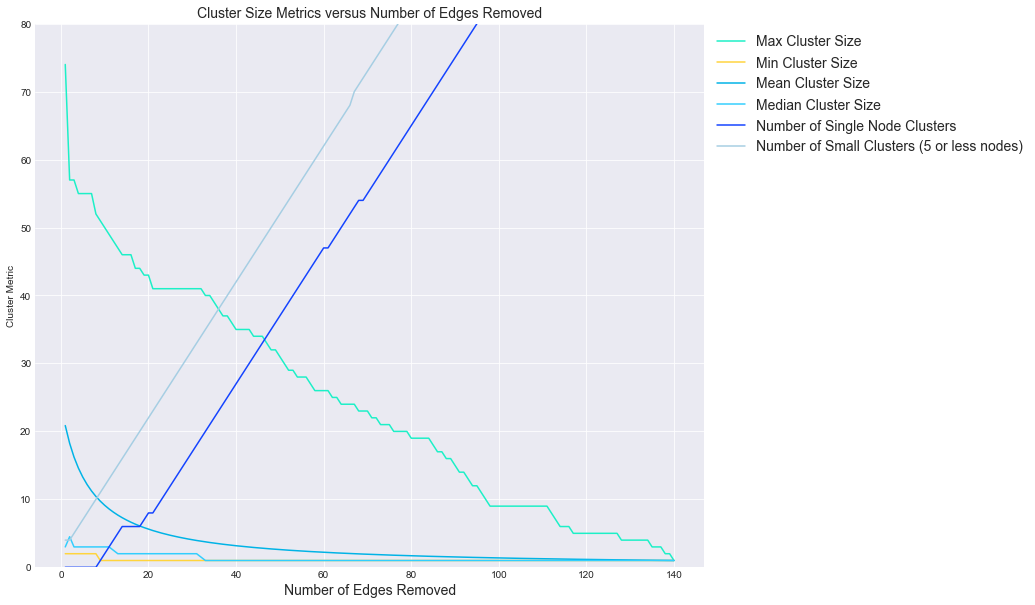

In [8]:
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, min_cluster_size, color=colors[1], label='Min Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, single_node_clusters, color=colors[5], label="Number of Single Node Clusters")

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, small_clusters, color=colors[6], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01, .75), fontsize=14)
plt.title("Cluster Size Metrics versus Number of Edges Removed", fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.show()


## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

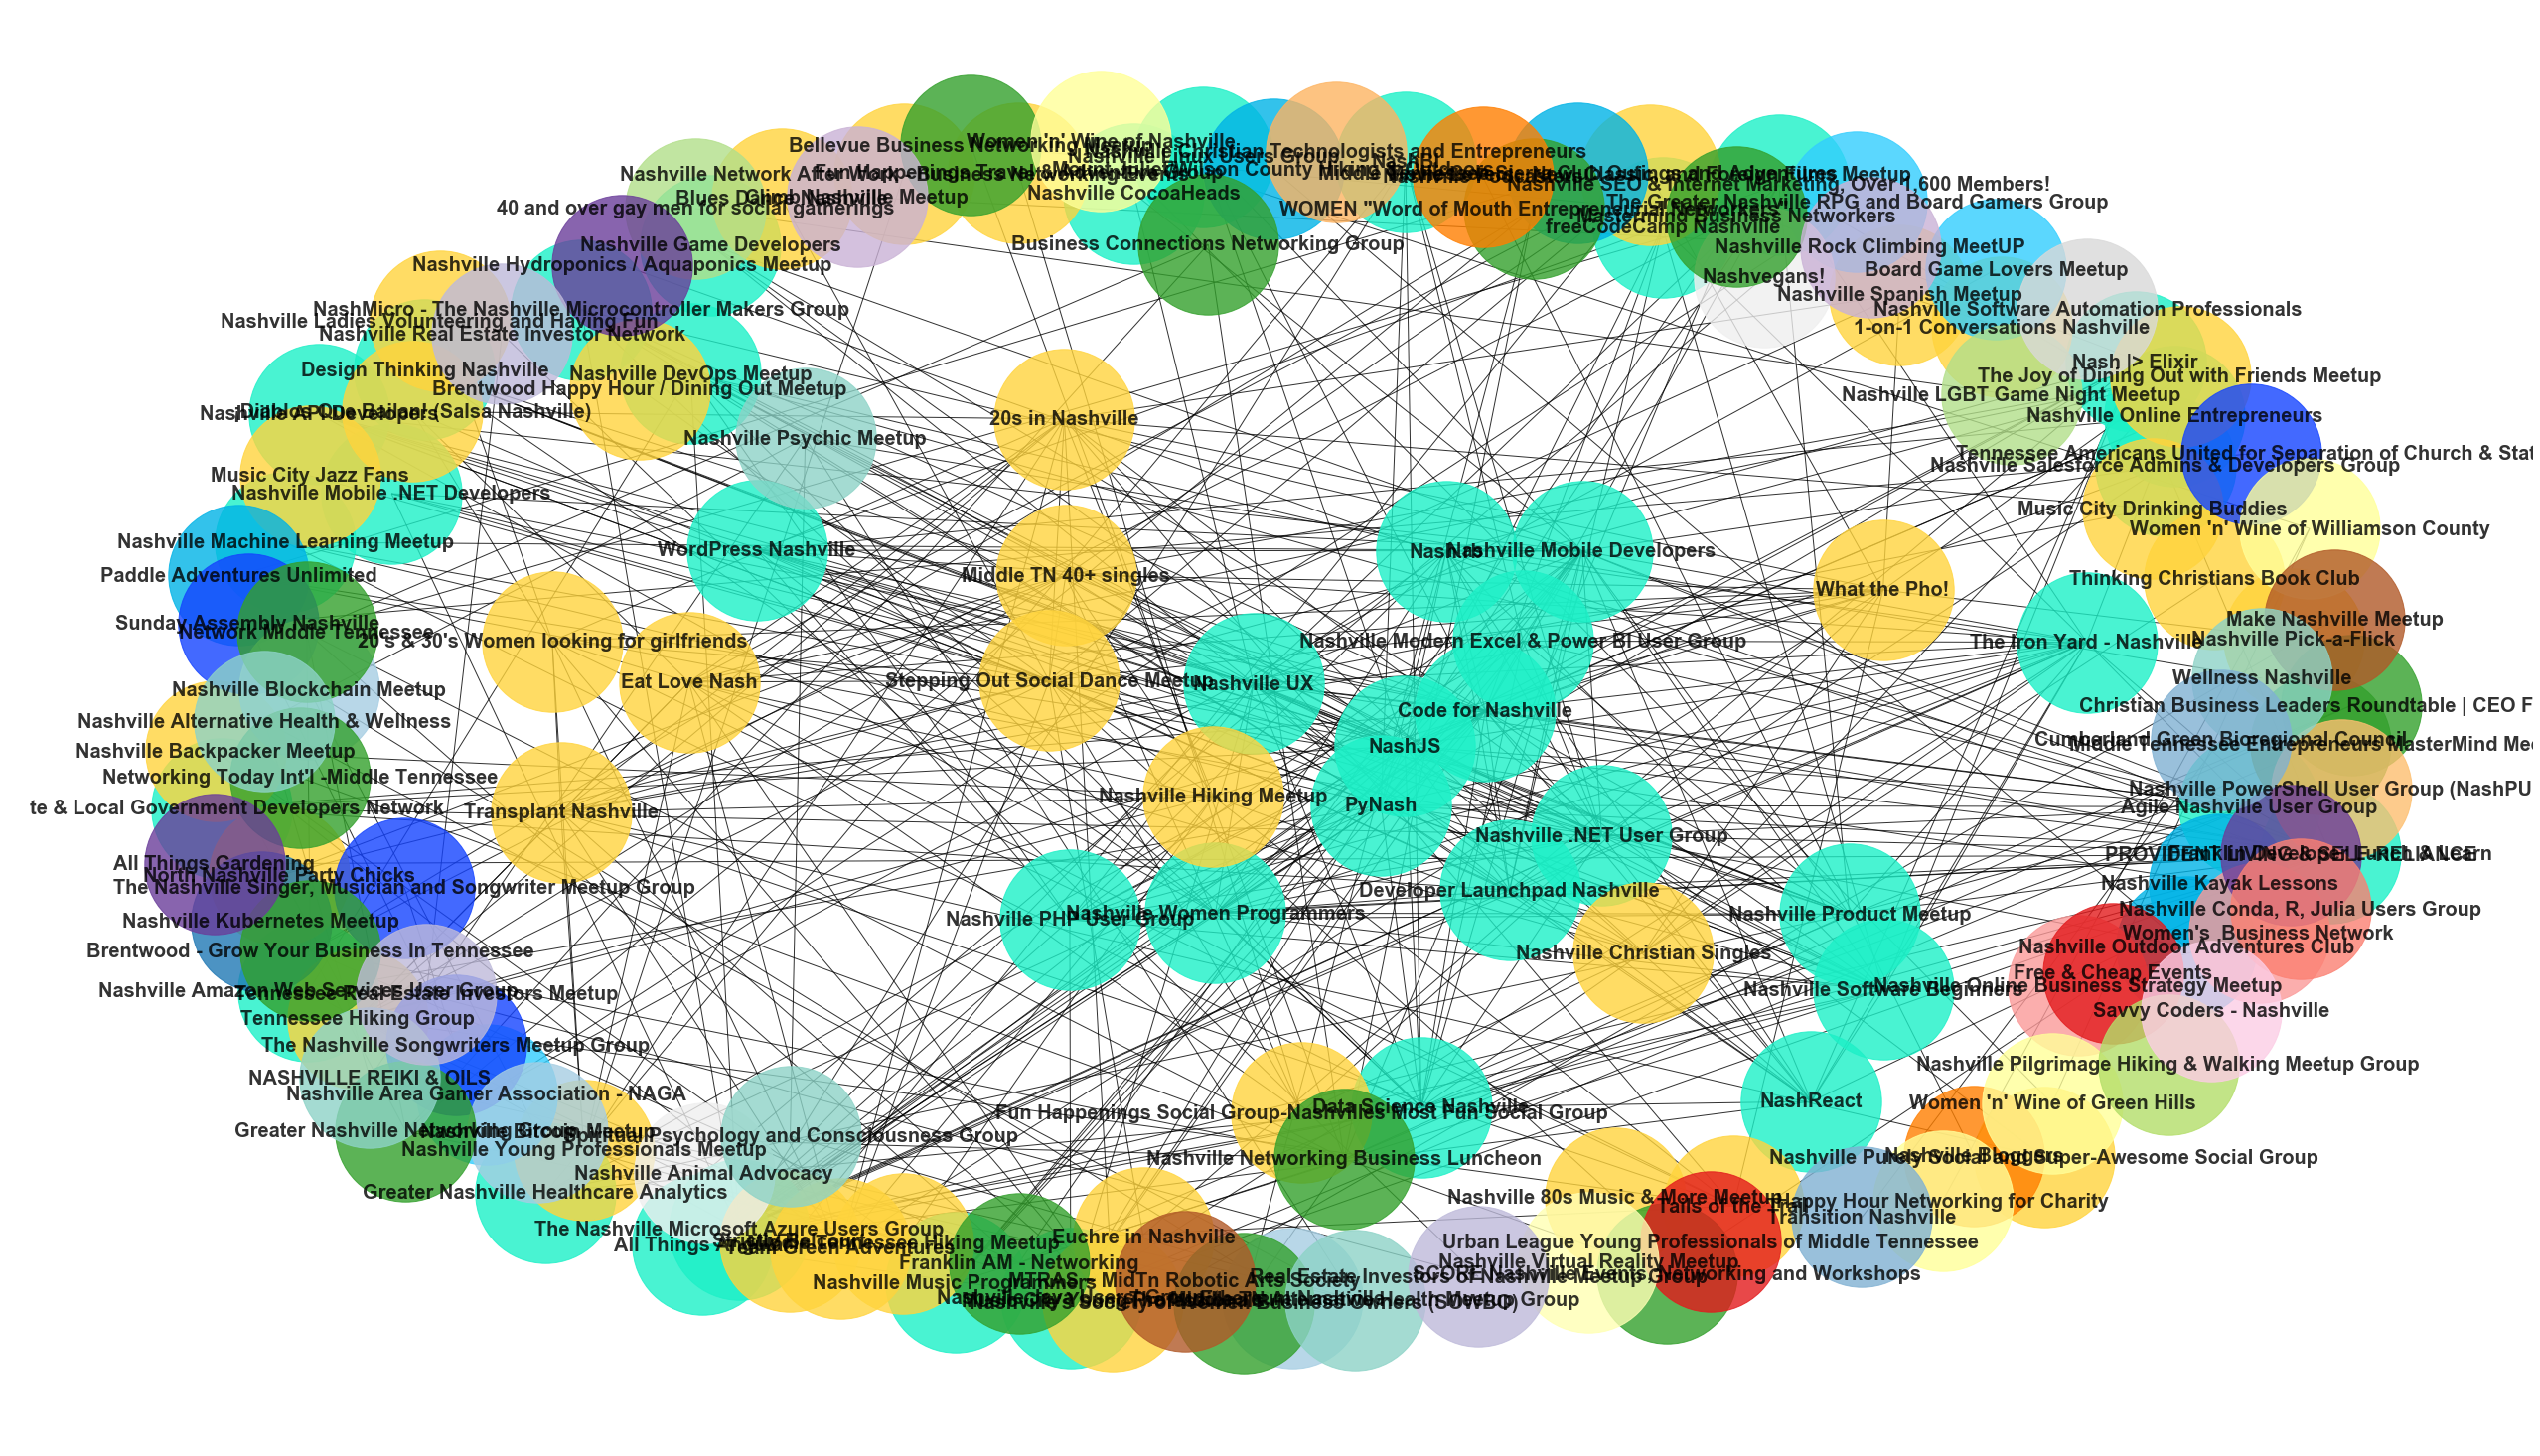

In [14]:
def plot_girvan_newman(G, clusters):
    
    fig = plt.figure(figsize=(35,20))
    colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]
    for n, c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G_subset, k=3.6, random_state=3), with_labels=True, node_color=colors[n], alpha=.8, node_size=20000, font_weight="bold", font_size=20)
    plt.show()
sns.set_style('white')
plot_girvan_newman(G_subset, gn_clusters[20])

In [17]:
clusters = pd.DataFrame(gn_clusters[20]).transpose()
clusters.columns = ['Cluster{}'.format(i) for i in range(1, len(clusters.columns)+1)]
clusters

ValueError: DataFrame constructor not properly called!

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               